In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import PIL

from random import randrange
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices()

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import pathlib
train_dir = r'C:\Users\superuser\Documents\DL\train\merged'
train_dir = pathlib.Path(train_dir)
test_dir = r'C:\Users\superuser\Documents\DL\test\merged'
test_dir = pathlib.Path(test_dir)

In [4]:
batch_size = 25
img_height = 360
img_width = 640

seed = randrange(1000)

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  smart_resize = True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  smart_resize = True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 16419 files belonging to 4 classes.
Found 6070 files belonging to 4 classes.
['DL1', 'DL2', 'DL3', 'DL_BG']


In [9]:
num_classes = len(class_names)
# layers.experimental.preprocessing.Resizing(360,640),
# layers.experimental.preprocessing.RandomFlip("horizontal"),
# layers.experimental.preprocessing.RandomRotation(0.5,fill_mode='constant'),
model = Sequential([
  layers.experimental.preprocessing.Rescaling(scale=1./127.5, offset=-1, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.Resizing(180,320),
  layers.Conv2D(32, 8, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 8, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 8, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 8, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 8, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])



In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 360, 640, 3)       0         
_________________________________________________________________
resizing_1 (Resizing)        (None, 180, 320, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 180, 320, 32)      6176      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 90, 160, 32)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 90, 160, 32)       65568     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 45, 80, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 45, 80, 32)       

In [12]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/20
657/657 [==============================] - 289s 357ms/step - loss: 0.8815 - accuracy: 0.5623 - val_loss: 0.2139 - val_accuracy: 0.9237
Epoch 2/20
657/657 [==============================] - 205s 311ms/step - loss: 0.1560 - accuracy: 0.9414 - val_loss: 0.1047 - val_accuracy: 0.9567
Epoch 3/20
657/657 [==============================] - 179s 272ms/step - loss: 0.0858 - accuracy: 0.9680 - val_loss: 0.1376 - val_accuracy: 0.9430
Epoch 4/20
657/657 [==============================] - 178s 271ms/step - loss: 0.0648 - accuracy: 0.9767 - val_loss: 0.1198 - val_accuracy: 0.9595
Epoch 5/20
657/657 [==============================] - 178s 271ms/step - loss: 0.1425 - accuracy: 0.9549 - val_loss: 0.0878 - val_accuracy: 0.9646
Epoch 6/20
657/657 [==============================] - 180s 274ms/step - loss: 0.0548 - accuracy: 0.9824 - val_loss: 0.0890 - val_accuracy: 0.9722
Epoch 7/20
657/657 [==============================] - 180s 274ms/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 0.0873 -

In [13]:
model.save(r'C:\Users\superuser\Documents\DL\models\rotordet_net_v3_1')

INFO:tensorflow:Assets written to: C:\Users\superuser\Documents\DL\models\rotordet_net_v3_1\assets


In [14]:
np.save('my_history.npy',history.history)
#history=np.load('my_history.npy',allow_pickle='TRUE').item()


In [21]:

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_set_dir,
  smart_resize = True,
  image_size=(img_height, img_width),
  batch_size=batch_size)
test_results = model.evaluate(test_ds,batch_size=256)

Found 6070 files belonging to 4 classes.
243/243 [==============================] - 103s 414ms/step - loss: 0.0979 - accuracy: 0.9766


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


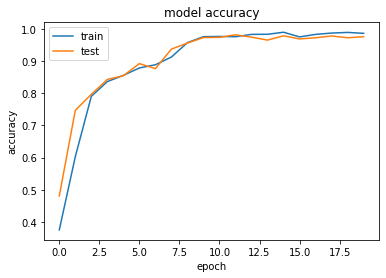

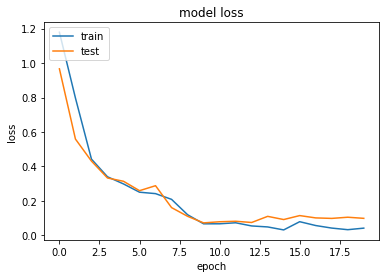

In [20]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
print("test loss, test acc:", test_results)


test loss, test acc: [0.030032122507691383, 0.9902551770210266]


In [14]:
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

<PrefetchDataset shapes: ((None, 720, 1280, 3), (None,)), types: (tf.float32, tf.int32)>

In [1]:
import tensorflow as tf
model = tf.keras.models.load_model('rotordet_net_v2')


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 720, 1280, 3)      0         
_________________________________________________________________
resizing (Resizing)          (None, 180, 320, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 320, 16)      6928      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 160, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 160, 32)       73760     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 80, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 80, 64)        2

In [19]:

model.layers[10].get_config()

{'name': 'flatten',
 'trainable': True,
 'dtype': 'float32',
 'data_format': 'channels_last'}

In [29]:
# single_sample_path = r'D:\Dokumente\Uni\Signalverarbeitung\Project\data\SignalVerarb_videos\baseline\frames\drinnen_1280x720_50fps\frame359.png'
n_classes = len(class_names)
confusion_mat = np.zeros([n_classes,n_classes])
misclassified = [[[] for i in range(4)] for j in range(4)]
for i_class in range(n_classes):
    imgs = list(data_dir.glob(class_names[i_class] + '/*'))
    print(class_names[i_class])
    for i_samp in range(len(imgs)):
        single_sample_path = str(imgs[i_samp])
        img = keras.preprocessing.image.load_img(single_sample_path, target_size=(img_height, img_width))
        sample_input = np.array([np.asarray(img),])
        predicted = model.predict(sample_input)
        i_class_pred = np.argmax(predicted)
        confusion_mat[i_class,i_class_pred] = confusion_mat[i_class,i_class_pred]+1
        if i_class != i_class_pred:
            misclassified[i_class][i_class_pred].append(single_sample_path)




DL1
DL2
DL3
DL_BG


<ipython-input-33-2e07c90565a5>:1: RuntimeWarning: divide by zero encountered in log2
  plt.imshow(np.log2(confusion_mat))


([<matplotlib.axis.YTick at 0x2774422ea30>,
 [Text(0, 0, 'DL1'),
  Text(0, 1, 'DL2'),
  Text(0, 2, 'DL3'),
  Text(0, 3, 'DL_BG')])

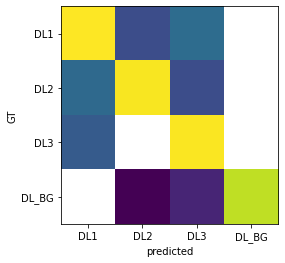

In [33]:

plt.imshow(np.log2(confusion_mat))
plt.xlabel('predicted')
plt.ylabel('GT')
plt.xticks(np.arange(4),class_names)
plt.yticks(np.arange(4),class_names)

In [31]:
confusion_mat

array([[864.,   5.,  11.,   0.],
       [ 10., 806.,   5.,   0.],
       [  7.,   0., 823.,   0.],
       [  0.,   1.,   2., 448.]])

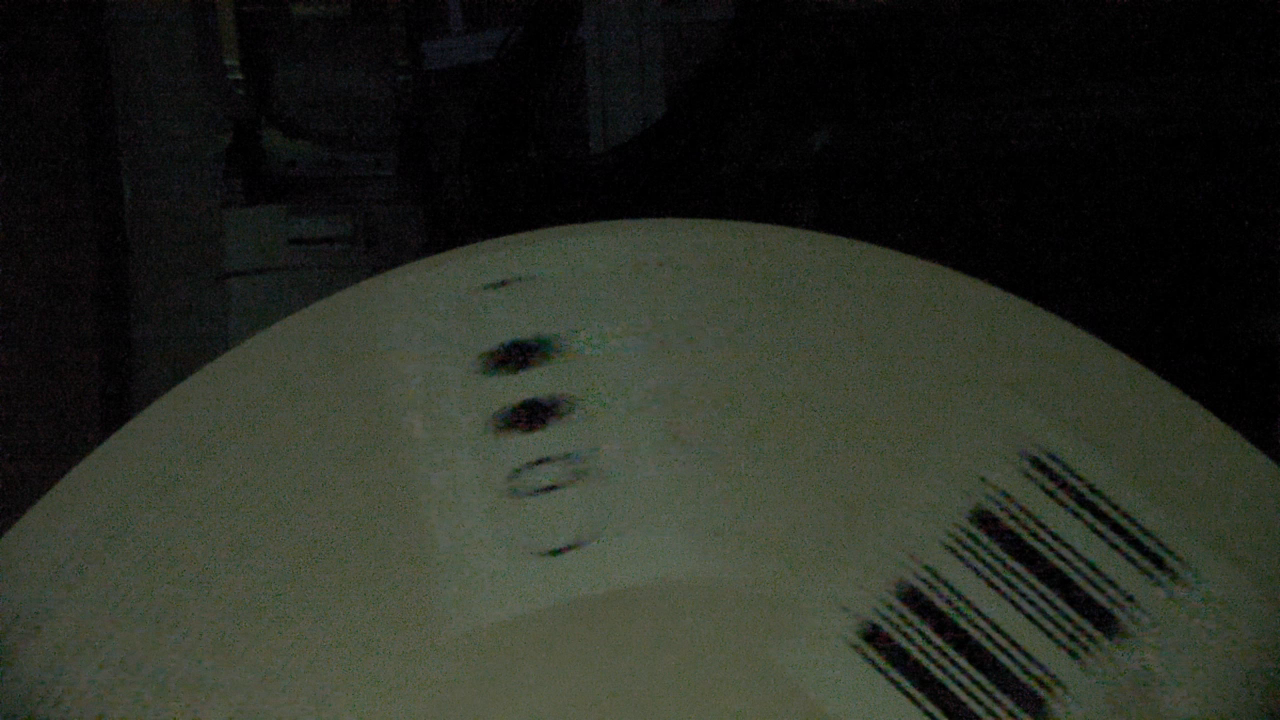

In [25]:

# imgs = list(data_dir.glob('DL1/*'))
class_GT = 0
class_pred = 1
for i in range(16)

PIL.Image.open(misclassified[class_GT][class_pred][20])
